In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

In [34]:
white = pd.read_csv('white_wine.csv')
white_wines = 'White Wine'
white['Wine_Color'] = white_wines
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  Wine_Color            4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [35]:
red = pd.read_csv('red_wine.csv')
red_wines = 'Red Wine'
red['Wine_Color'] = red_wines
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Wine_Color            1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [36]:
frames = [white, red]

In [37]:
wines = pd.concat(frames)
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Wine_Color            6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [38]:
wines = wines.rename(columns=({'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}))
wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White Wine
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White Wine
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White Wine
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White Wine
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White Wine


In [40]:
wines.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color
1365,7.8,0.500,0.09,2.20,0.115,10.0,42.0,0.99710,3.18,0.62,9.5,5,Red Wine
679,5.7,0.320,0.38,4.75,0.033,23.0,94.0,0.99100,3.42,0.42,11.8,7,White Wine
3159,6.9,0.190,0.32,7.90,0.042,30.0,130.0,0.99456,3.40,0.39,10.5,6,White Wine
3375,7.8,0.220,0.26,9.00,0.047,38.0,132.0,0.99700,3.25,0.53,10.2,6,White Wine
4601,6.9,0.230,0.35,6.90,0.030,45.0,116.0,0.99244,2.80,0.54,11.0,6,White Wine
121,8.8,0.550,0.04,2.20,0.119,14.0,56.0,0.99620,3.21,0.60,10.9,6,Red Wine
490,9.3,0.775,0.27,2.80,0.078,24.0,56.0,0.99840,3.31,0.67,10.6,6,Red Wine
1190,9.1,0.400,0.57,4.60,0.080,6.0,20.0,0.99652,3.28,0.57,12.5,6,Red Wine
3804,8.1,0.200,0.30,1.30,0.036,7.0,49.0,0.99242,2.99,0.73,10.3,5,White Wine
2283,7.4,0.330,0.26,15.60,0.049,67.0,210.0,0.99907,3.06,0.68,9.5,5,White Wine


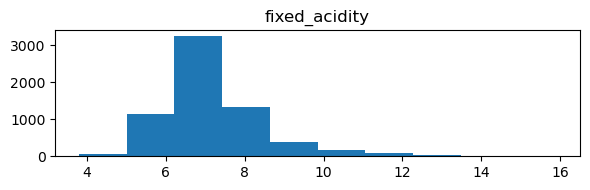

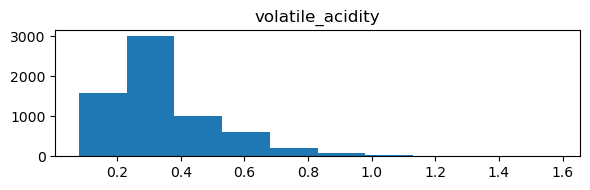

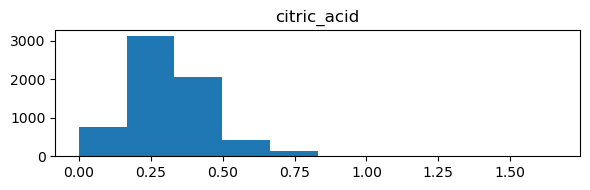

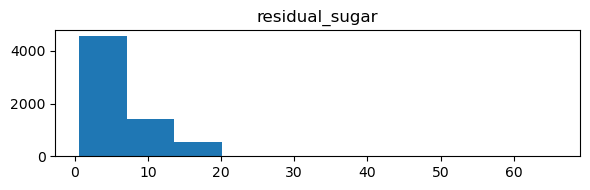

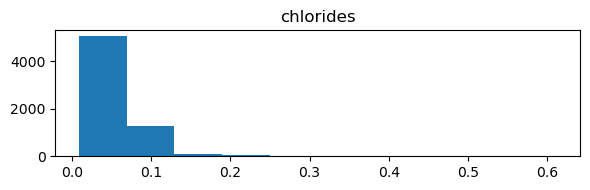

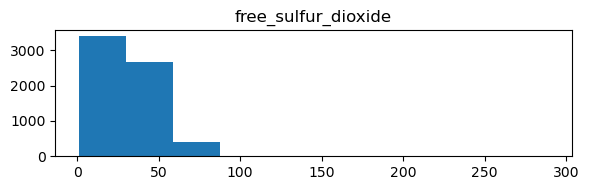

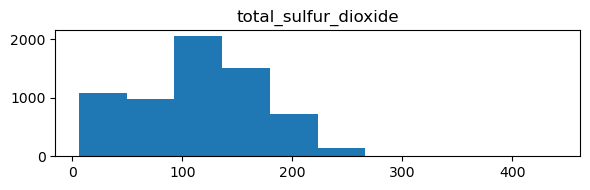

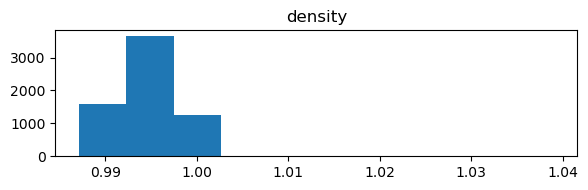

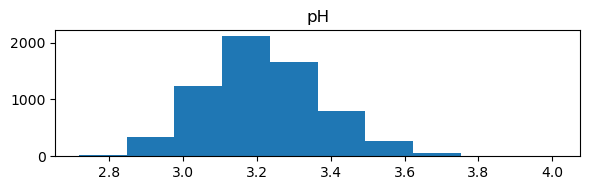

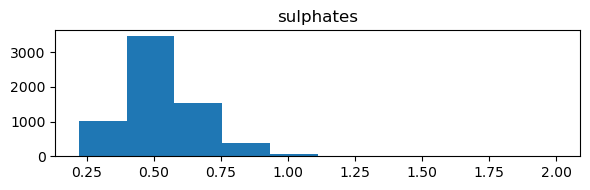

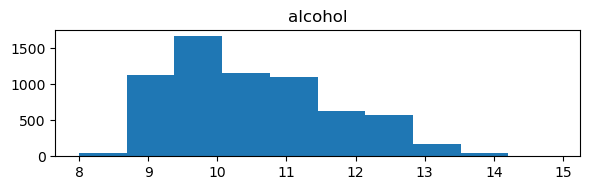

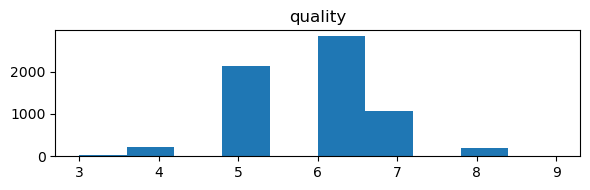

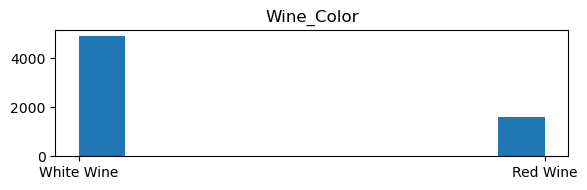

In [43]:
for col in wines:
    plt.figure(figsize = (6,2))
    plt.hist(wines[col])
    plt.title(f'{col}')
    plt.tight_layout();

FIXED_ACIDITY
count of unique: 106


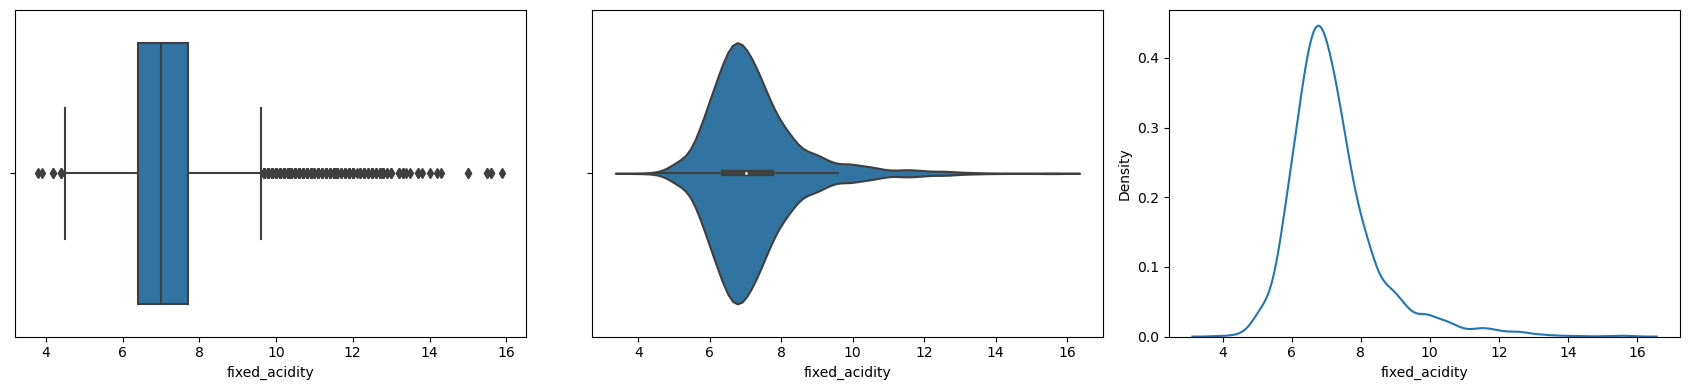

VOLATILE_ACIDITY
count of unique: 187


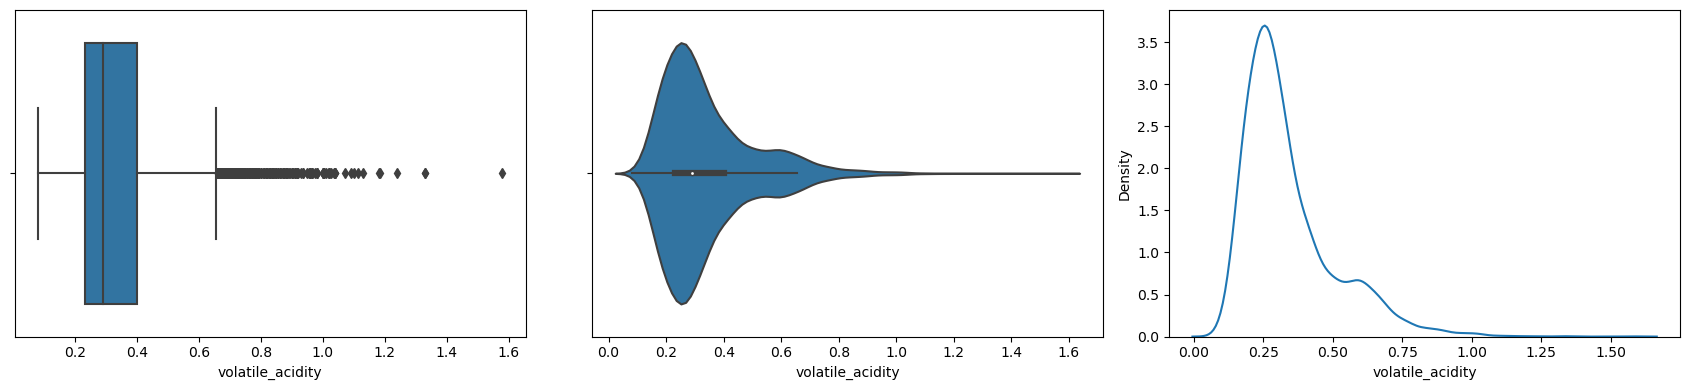

CITRIC_ACID
count of unique: 89


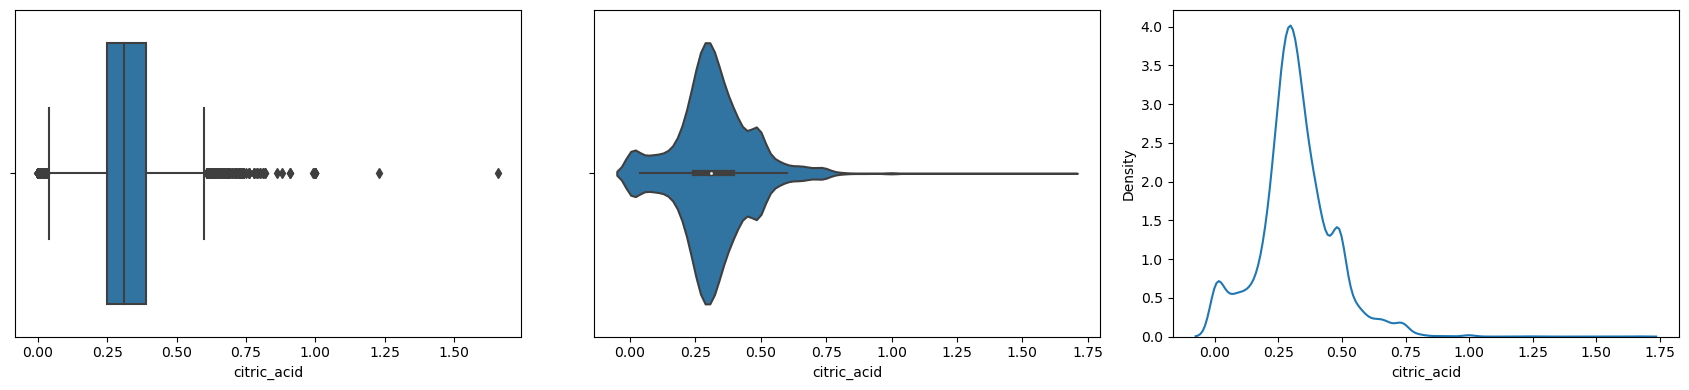

RESIDUAL_SUGAR
count of unique: 316


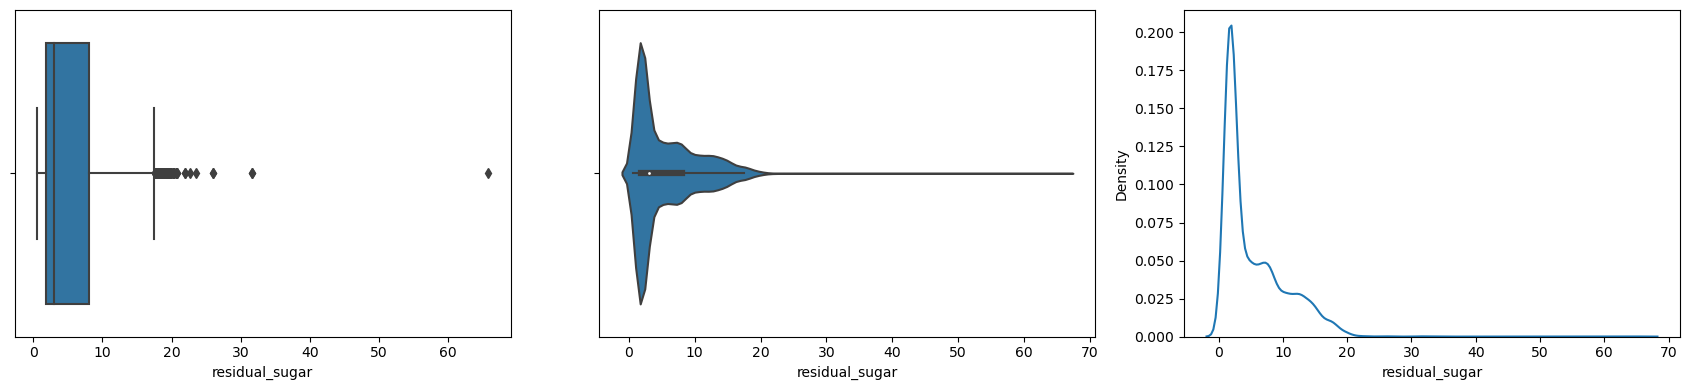

CHLORIDES
count of unique: 214


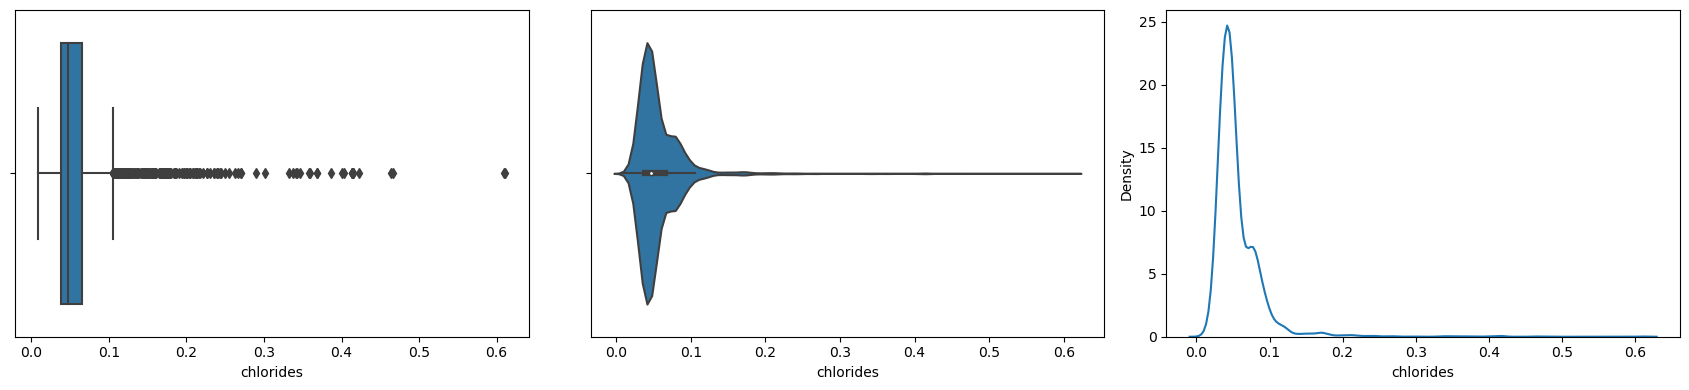

FREE_SULFUR_DIOXIDE
count of unique: 135


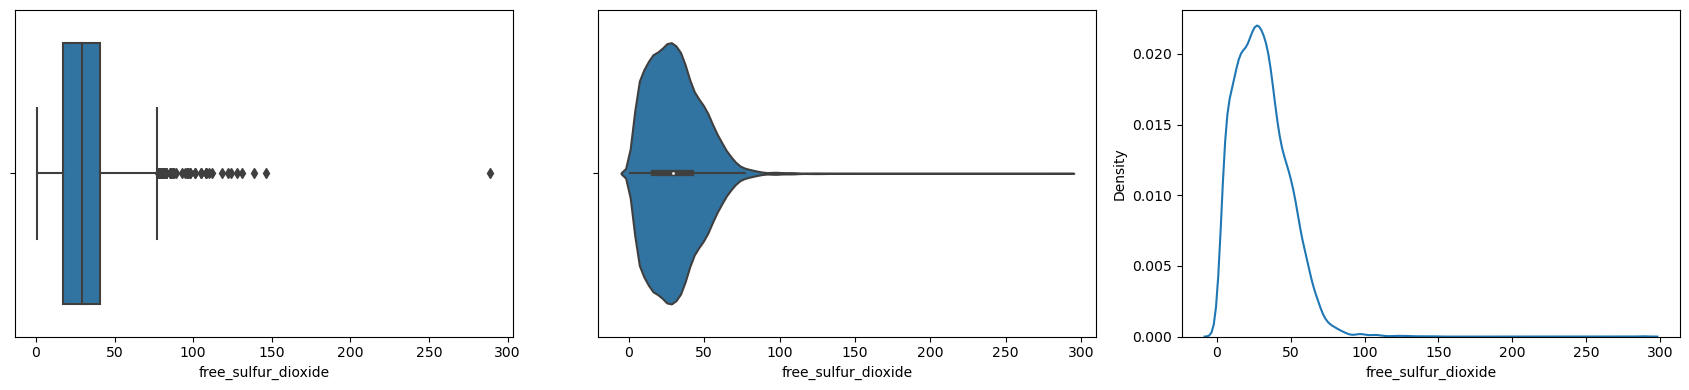

TOTAL_SULFUR_DIOXIDE
count of unique: 276


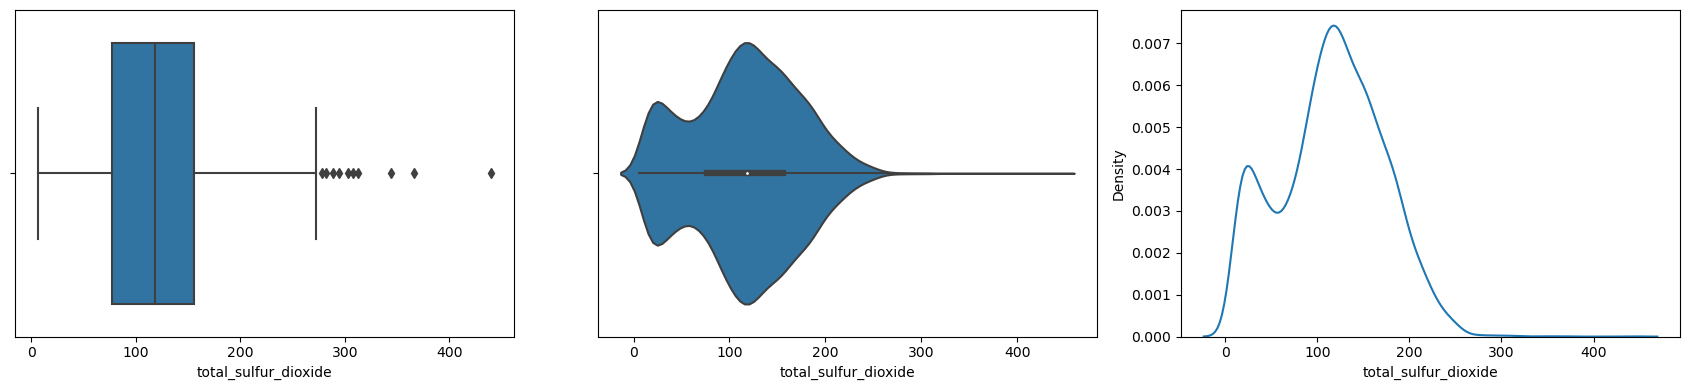

DENSITY
count of unique: 998


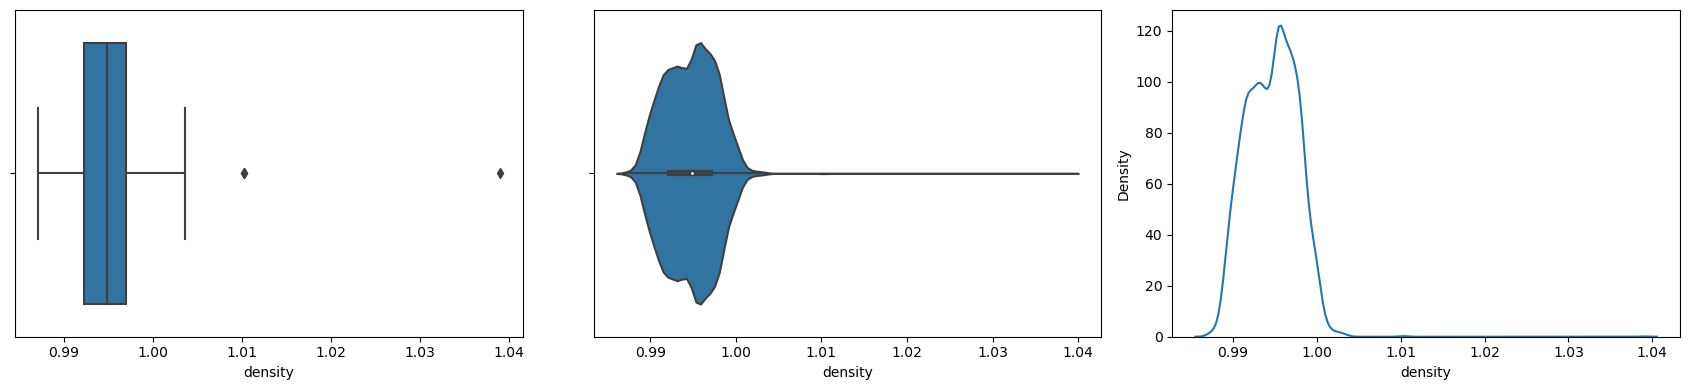

PH
count of unique: 108


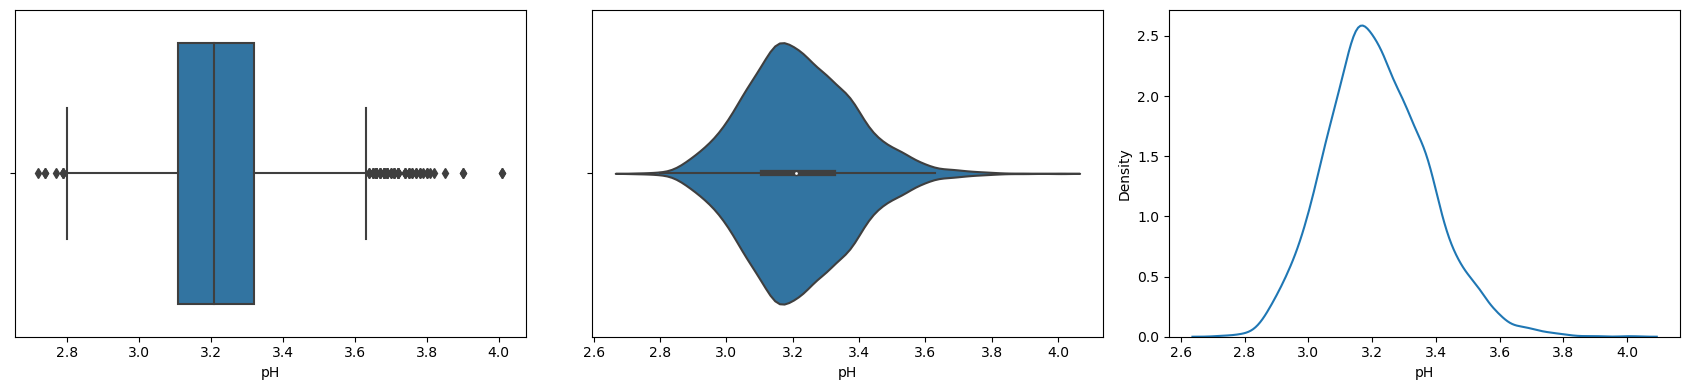

SULPHATES
count of unique: 111


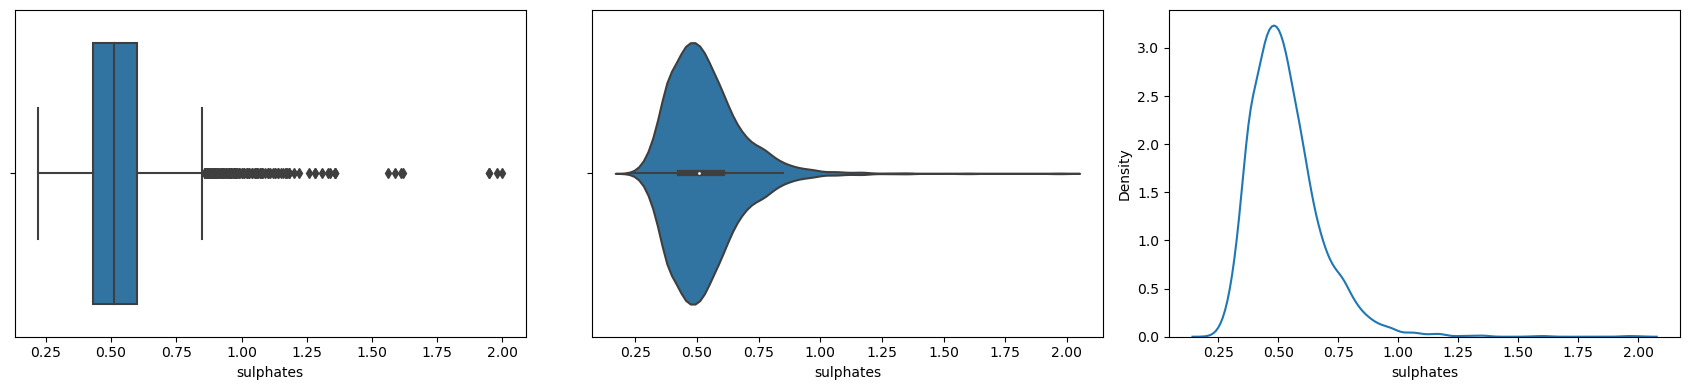

ALCOHOL
count of unique: 111


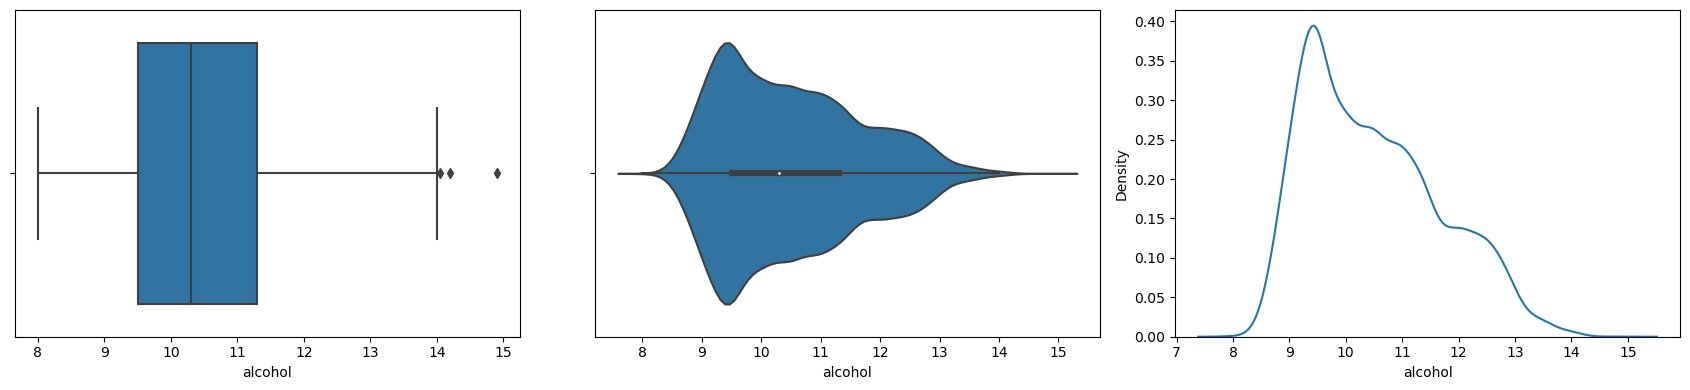

QUALITY
count of unique: 7


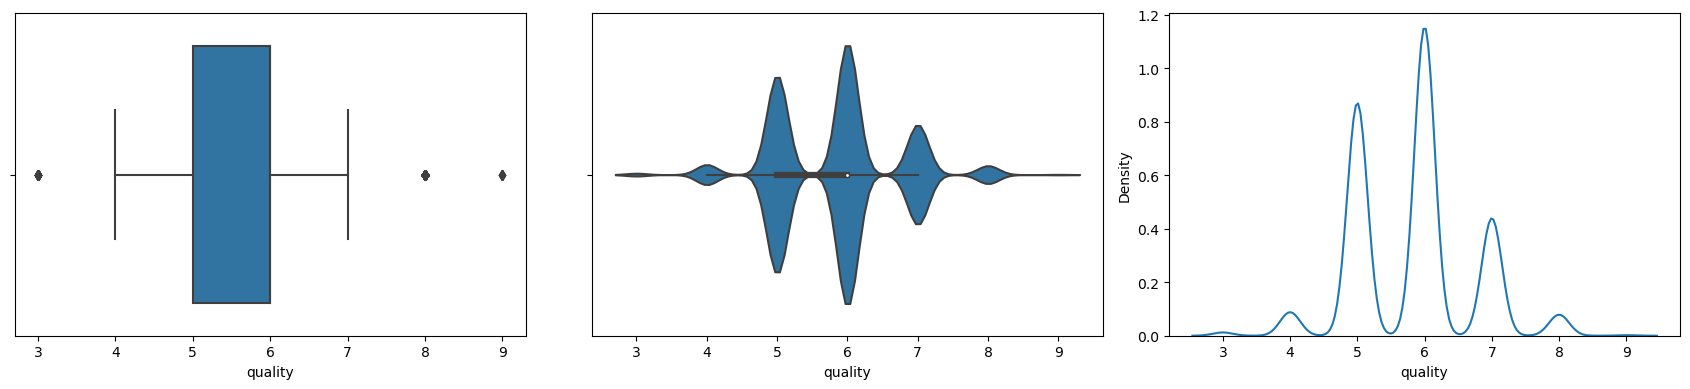

In [44]:
winey = wines.drop(columns='Wine_Color')
for col in winey:
    print(col.upper())
    print("count of unique:",wines[col].nunique())
    # plot
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
    sns.boxplot(data= wines, x=col, ax=ax[0])
    sns.violinplot(data= wines, x=col, ax=ax[1])
    sns.kdeplot(wines, x=col, ax=ax[2])
    plt.tight_layout()
    plt.show()

Are any of the features correlated? Can I apply some sort of feature selection?\
Should I look at the top 'x' best and bottom 'x' worst wines for comparison? Is that a way to gain perspective?\
The range of quality is 0-10. Very few low and top quality wines. A lot of middle-quality wines in the lot.\
Classification or regression? Should I do both for a comparison given the time I have to work on this?\
Are all input variables relevant?\
Initial Hypothesis:
- Low PH and low acidity contributes to higher quality.
- Alcohol has no affect on quality.
- Chlorides and Residual sugar have zero contribution to quality.